Using file: df_individual_metrics_20260128T212113.csv

Global area statistics:
count       408
unique      245
top       14472
freq          7
Name: area_px, dtype: int64

Area statistics per spot:
         count  unique    top  freq
spot_id                            
0           19      10   4256     5
1           19       6   6279     6
2           15       7   8137     4
3           14       5   9570     5
4           15       7  12480     6
5           15       9  19845     3
6           11      10   4880     2
7            4       4   8901     1
8           12      12   7992     1
9           10       9   7350     2
10           8       6   7242     2
11          16       7   9028     5
12          14      14   9968     1
13          16      14  11067     2
14          16       5  14472     7
15          16      14  18056     2
18          13       8  24648     4
19          16       4   5016     6
20          15       7   4284     4
21          15      10   4316     3
22        

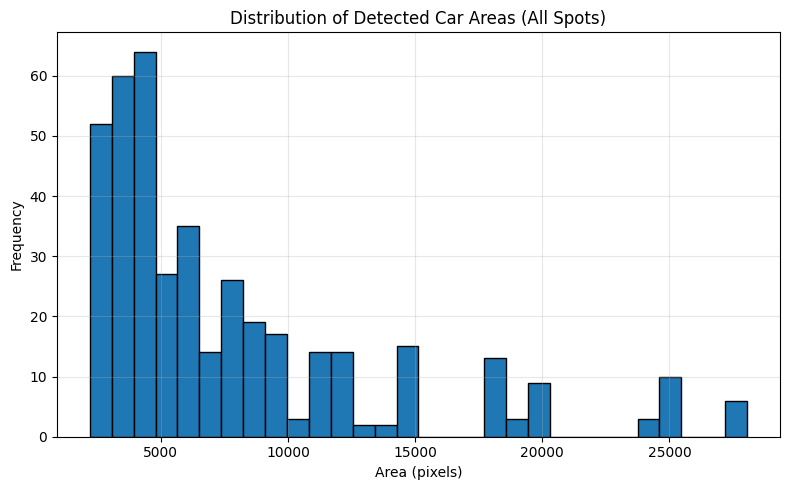

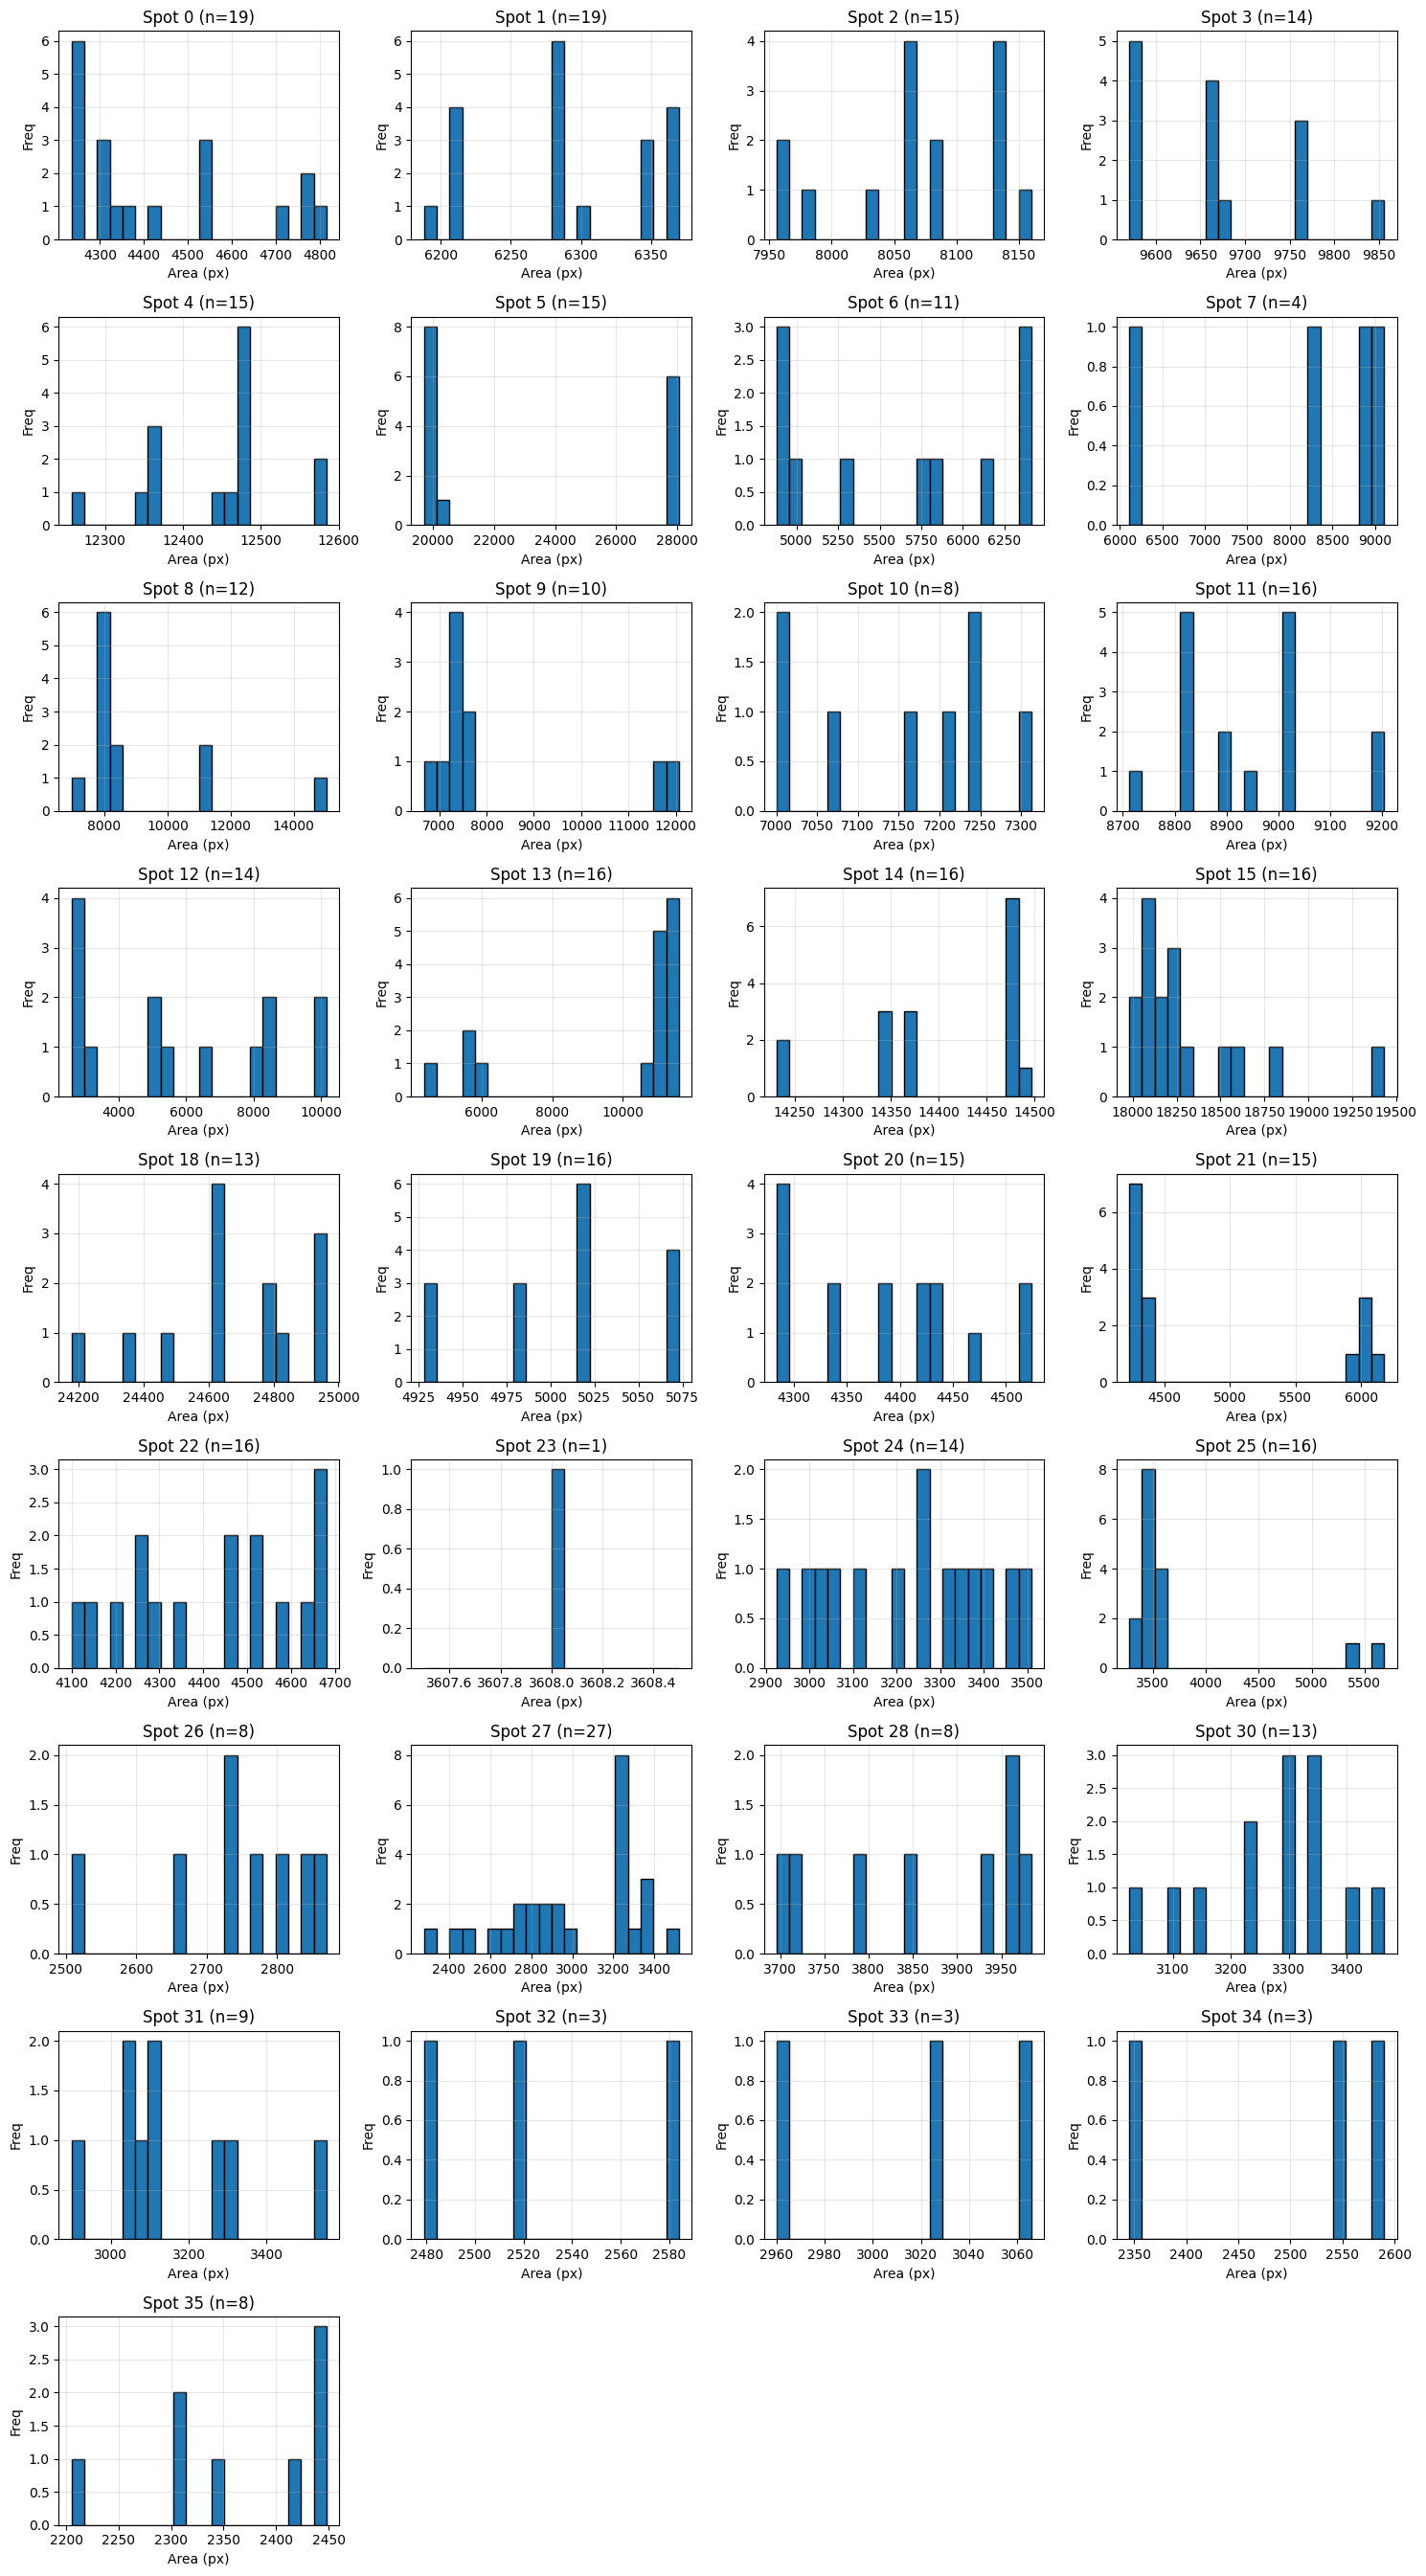


Detected 29 potential outliers (area_px > 18856)
              image_name spot_id area_px
0    2015-11-12_1039.jpg      18   24648
1    2015-11-12_1039.jpg       5   19845
29   2015-11-12_1109.jpg      18   24648
30   2015-11-12_1109.jpg       5   19992
52   2015-11-12_1339.jpg      18   24960
76   2015-11-12_1439.jpg      18   24648
77   2015-11-12_1439.jpg       5   28055
102  2015-11-12_1609.jpg      18   24335
103  2015-11-12_1609.jpg       5   27720
124  2015-11-12_1209.jpg      18   24963
125  2015-11-12_1209.jpg       5   19845
150  2015-11-12_1539.jpg      18   24806
151  2015-11-12_1539.jpg       5   27745
169  2015-11-12_0909.jpg       5   20128
185  2015-11-12_0939.jpg       5   19992
224  2015-11-12_1639.jpg       5   27900
225  2015-11-12_1639.jpg      18   24178
243  2015-11-12_1139.jpg      18   24804
244  2015-11-12_1139.jpg       5   19845
263  2015-11-12_1309.jpg      18   24804
264  2015-11-12_1309.jpg       5   19710
265  2015-11-12_1309.jpg      15   19431
289  20

In [4]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import glob
import os

# === 1. Find the most recent CSV automatically ===
files = glob.glob("df_individual_metrics_*.csv")
latest_file = max(files, key=os.path.getctime)
print(f"Using file: {latest_file}")

# === 2. Load and expand the CSV ===
df = pd.read_csv(latest_file)

# Convert stringified lists into Python lists
df["areas"] = df["areas"].apply(ast.literal_eval)
df["spots"] = df["spots"].apply(ast.literal_eval)

# Expand each row into multiple rows (area ↔ spot pairs)
df_expanded = df.explode(["areas", "spots"], ignore_index=True)
df_expanded.rename(columns={"areas": "area_px", "spots": "spot_id"}, inplace=True)

# === 3. Basic stats ===
print("\nGlobal area statistics:")
print(df_expanded["area_px"].describe())

# Statistics per spot
spot_stats = df_expanded.groupby("spot_id")["area_px"].describe()
print("\nArea statistics per spot:")
print(spot_stats)

# === 4. Global histogram ===
plt.figure(figsize=(8, 5))
plt.hist(df_expanded["area_px"], bins=30, edgecolor="black")
plt.title("Distribution of Detected Car Areas (All Spots)")
plt.xlabel("Area (pixels)")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# === 5. Histograms per spot ===
unique_spots = sorted(df_expanded["spot_id"].unique())
num_spots = len(unique_spots)
cols = 4
rows = (num_spots + cols - 1) // cols

plt.figure(figsize=(15, rows * 3))
for i, spot in enumerate(unique_spots, 1):
    plt.subplot(rows, cols, i)
    data = df_expanded.loc[df_expanded["spot_id"] == spot, "area_px"]
    plt.hist(data, bins=20, edgecolor="black")
    plt.title(f"Spot {spot} (n={len(data)})")
    plt.xlabel("Area (px)")
    plt.ylabel("Freq")
    plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# === 6. Optional: Identify potential outliers ===
q1 = df_expanded["area_px"].quantile(0.25)
q3 = df_expanded["area_px"].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr

outliers = df_expanded[df_expanded["area_px"] > upper_bound]
print(f"\nDetected {len(outliers)} potential outliers (area_px > {upper_bound:.0f})")
print(outliers[["image_name", "spot_id", "area_px"]])
